In [ ]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering

from lime import lime_image
from PIL import Image
import skimage as skimage

import os
import argparse

import numpy as np

In [2]:
#random number generator key (seed)
rng = jax.random.PRNGKey(0)

#create data folder
datapath = './data/'

In [3]:
#download datasets and store the splits
cif_train, cif_val, cif_test = load_cifar10(datapath)
wine_train, wine_val, wine_test = load_wine_quality(datapath)

#load models
cifar_model, _ = create_model(Cifar10CNN, rng, init_func=kaiming_uniform(), activation_func=relu)
wine_model, _ = create_model(WineQualityNetwork, rng, input_shape=(1, 11), init_func=kaiming_uniform(), activation_func=relu)

In [4]:
#create weight dictionary
weights = {
    'cifar' : {
        0 : load_weights(f'./model_checkpoints/cifar10/kaiming_uniform/relu/initial_weights.pkl'),
        1 : load_weights(f'./model_checkpoints/cifar10/kaiming_uniform/relu/best_weights.pkl'),
        2 : load_weights(f'./model_checkpoints/cifar10/kaiming_uniform/relu/overtrained_model.pkl')
                },
    'wine' : {
        0 : load_weights(f'./model_checkpoints/wine_quality/kaiming_uniform/relu/initial_weights.pkl'),
        1 : load_weights(f'./model_checkpoints/wine_quality/kaiming_uniform/relu/best_weights.pkl'),
        2 : load_weights(f'./model_checkpoints/wine_quality/kaiming_uniform/relu/overtrained_model.pkl')
                }
}

In [24]:
def skimage_segmentation(image : np.array, n_segments : int) -> tuple:
    img = Image.fromarray(np.array(image))
    mask = skimage.segmentation.slic(np.array(img), n_segments=n_segments)
    color_map = {i+1 : np.random.randint(0,255,3).tolist() for i in range(n_segments)}
    rgb_array = np.array([color_map[i] for i in mask.reshape(-1)]).reshape((*mask.shape, 3)).astype('uint8')
    return image, mask, rgb_array

In [25]:
image = np.array(Image.open('./img/PoggoRoggo.jpg'))
a, b, c = skimage_segmentation(image, n_segments=10)

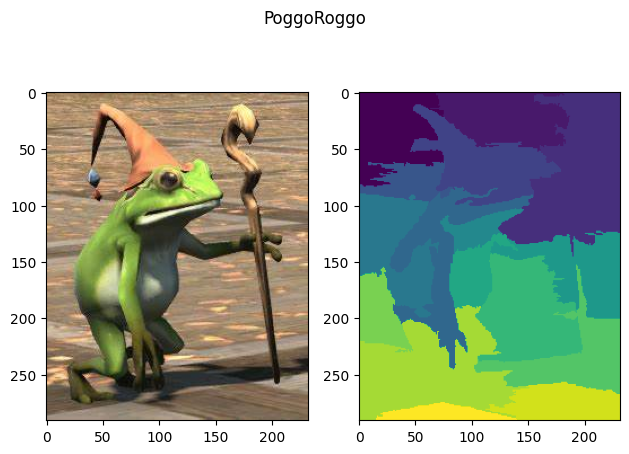

In [122]:
def display_images_side_by_side(img1, img2, title):
    fig, ax = plt.subplots(1, 2)
    
    # Display img1
    ax[0].imshow(img1)
    # ax[0].axis('off')  # No axes for img1
    
    # Display img2
    ax[1].imshow(img2)
    # ax[1].axis('off')  # No axes for img2
    
    # Set the title for the figure
    plt.suptitle(title)
    
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Call the function with your images and title
display_images_side_by_side(a, b, 'PoggoRoggo')

In [80]:
def segment_only(img, mask, seg=1, replace=[0,0,0]):
    segment = np.zeros(img.shape).astype('uint8')
    for i in np.ndindex(img.shape[:2]):
        if mask[i] == seg:
            segment[i] = img[i]

    return segment

In [146]:
def plot_segments(original, mask, segments):
    # Calculate the number of additional images
    n = len(segments) + 2

    # Create a grid for plotting
    ncols = 4
    nrows = n//4 if n % 4 == 0 else n//4+1

    # Create a figure and axes
    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 12))

    # Plot additional images
    c = -2
    for x in range(nrows):
        for y in range(ncols):
            axs[x,y].axis('off')
            
            if c == -2:
                axs[x,y].imshow(original)
                
            elif c == -1:
                axs[x,y].imshow(mask)
                
            elif c <= len(segments):
                axs[x,y].imshow(segments[c])
                
            else:
                axs[x,y].imshow(np.full((original.shape), 255).astype('uint8'))
            c += 1
            
    plt.savefig('./img/PoggoRoggo1.jpg')
    plt.show()

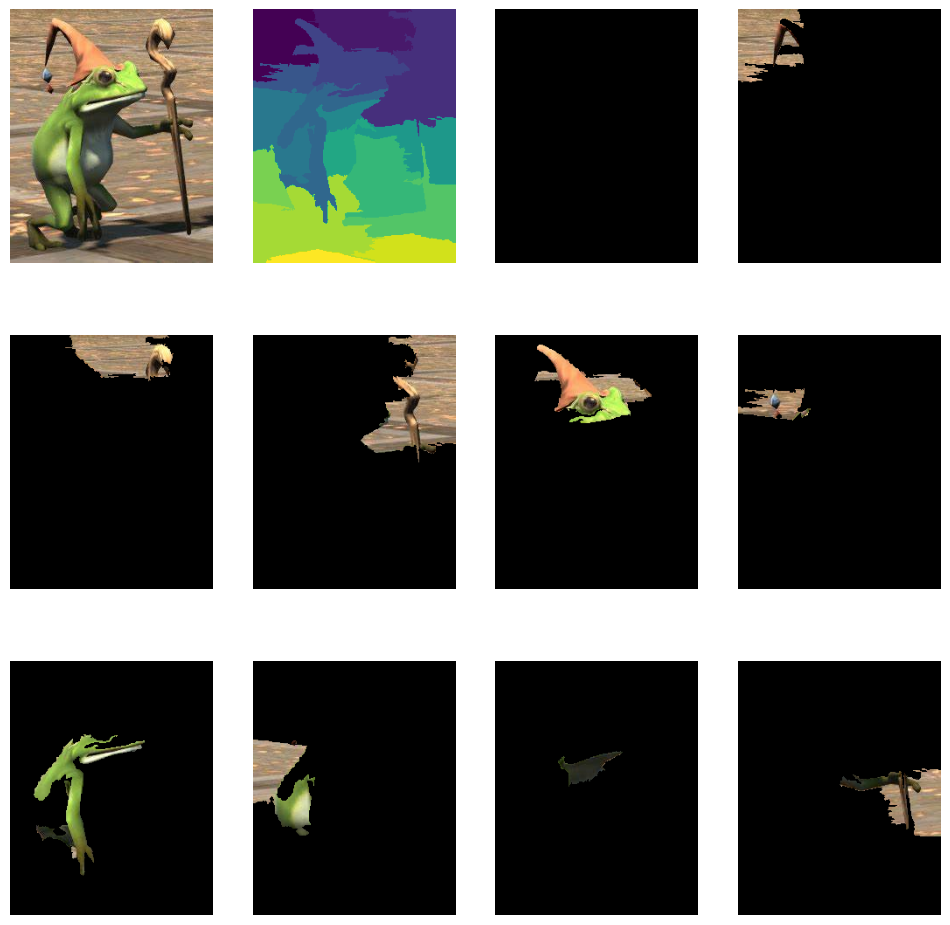

In [149]:
plot_segments(a, b, [segment_only(a, b, seg=i) for i in range(10)])

In [286]:
def create_scatter_plot(x, y, labels, title):
    """
    Creates a scatter plot with points as crosses, each label in a different color.

    Args:
        x (np.ndarray): Numpy array of x-coordinates.
        y (np.ndarray): Numpy array of y-coordinates.
        labels (list): List of labels corresponding to each point.
        title (str): Title for the plot.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
    """
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot each point with a cross marker
    for i, label in enumerate(range(3)):
        ax.scatter(x[i], y[i], marker='x', label=label)

    # Set title and axis labels
    ax.set_title(title)

    # Show legend
    ax.legend()

    # Show the plot
    plt.show()

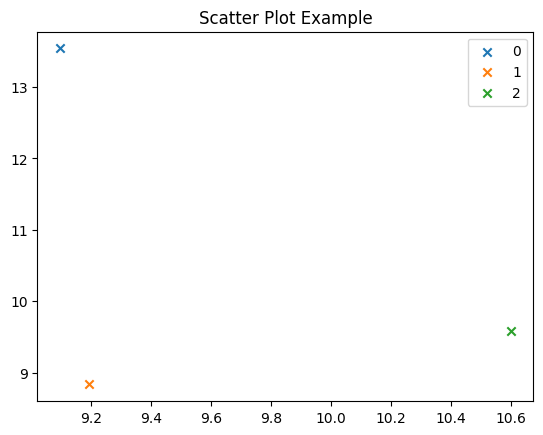

In [287]:
create_scatter_plot(x, y, labels, title='Scatter Plot Example')

In [288]:
dists = [(0,0,5,5),(10,5,2,3),(1,1,2,2)]
data, labels = generate_sample_data(dists, d=3, p=[1/3]*3)

In [290]:
data[::,0].shape

(300,)

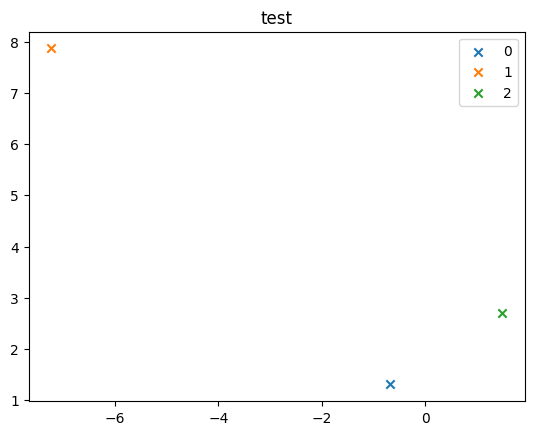

In [289]:
create_scatter_plot(data[::,0], data[::,1], labels.tolist(), title='test')

In [193]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [213]:
X.shape

(6, 2)